## DESAFIO

Inadimplência em cartão de crédito - Desafio Kaggle.

Fazer uma análise do dataset, variáveis e relações, testar diversos modelos preditivos de machine learning, comparar suas performances e escolher o melhor.


https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

### Variáveis disponíveis e suas descrições

**ID**: ID of each client

**LIMIT_BAL**: Amount of given credit in NT dollars (includes 
individual and family/supplementary credit

**SEX**: Gender (1=male, 2=female)

**EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE**: Marital status (1=married, 2=single, 3=others)

**AGE**: Age in years

**PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

**PAY_2**: Repayment status in August, 2005 (scale same as above)

**PAY_3**: Repayment status in July, 2005 (scale same as above)

**PAY_4**: Repayment status in June, 2005 (scale same as above)

**PAY_5**: Repayment status in May, 2005 (scale same as above)

**PAY_6**: Repayment status in April, 2005 (scale same as above)

**BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)

**BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)

**BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)

**BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)

**BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)

**BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)

**PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)

**PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)

**PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)

**PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)

**PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)

**PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)

**default.payment.next.month**: Default payment (1=yes, 0=no)

## RESOLUÇÃO

### Pacotes e padronização

In [ ]:
# Importando pacotes que serão utilizados de início.
!pip install kaggle
from google.colab import files
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 100)

### Importando dados

Para carregar o arquivo diretamento do Kaggle, é necessário o uso da API.

Para isso, é preciso gerar o arquivo token 'kaggle.json' nas configurações da conta e fazer o upload na célula abaixo.

In [ ]:
# Importando credenciais kaggle.json.
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Realizando download do dataset.
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset --force

  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 50.7MB/s]


In [ ]:
# Carregando dataset.
df = pd.read_csv('/content/default-of-credit-card-clients-dataset.zip')
print('\n\nO Dataframe possui {0} linhas e {1} colunas.'.format(df.shape[0],df.shape[1]))
df.head(5)



O Dataframe possui 30000 linhas e 25 colunas.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Uma primeira olhada nos dados.
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Como podemos notar, todas as contagens são de 30k, é um indicativo de que não temos dados faltantes, porém para validar utilizaremos a contagem de nulos.

In [ ]:
# Contando campos não vazios.
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Com o somatório podemos confirmar a não presença de dados faltantes.

Ao ler sobre as variáveis, notamos que a variável PAY_0 se refere ao mesmo mês visto na BILL_AMT1 e PAY_AMT1, sendo assim renomearemos para PAY_1, facilitado a compreensão.

In [ ]:
# Renomeando coluna pay_0 para pay_1.
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
# Identificando variáveis categóricas e numéricas.
var_categoricas = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
var_numericas = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [ ]:
# Verificando se as variáveis categóricas estão todas rotuladas corretamente conforme descrição.
for i in var_categoricas:
  print(df[i].value_counts(), '--------------------------------')

2    18112
1    11888
Name: SEX, dtype: int64 --------------------------------
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 --------------------------------
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 --------------------------------
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64 --------------------------------
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64 --------------------------------
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64 --------------------------------
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6    

Notamos que as variáveis EDUCATION, MARRIAGE e PAY_ possuem classes sem descrição. 
Para facilitar o desenvolvimento e futuras visualizações, irei atribuir os rótulos as variáveis categóricas EDUCATION e MARRIAGE sem rótulos, irei acrescentar como 'unknown'.
Já as variáveis PAY, lendo o fórum encontrei informações para o devido preenchimento.

In [ ]:
# Atribuindo os rótulos informados no problema pra facilitar interpretação.
sex = {1:'male', 2:'female'}
education = {0: 'unknown', 1:'graduate_school', 2:'university', 3:'high_school', 4:'others', 5:'unknown1', 6:'unknown2'}
marriage = {0: 'unknown', 1:'married', 2:'single', 3:'others'}
pay = {-2:'inactive',-1:'pay_duly',0:'minimum_paid', 1:'payment_delay_1m', 2:'payment_delay_2m', 3:'payment_delay_3m', 4:'payment_delay_4m',
       5:'payment_delay_5m', 6:'payment_delay_6m', 7:'payment_delay_7m', 8:'payment_delay_8m', 9:'payment_delay_9m+'}

lista_rotulos = [sex,education,marriage,pay] 

for i, var in enumerate(var_categoricas):
  if i > 3:
    i = 3
  df[var] = df[var].map(lista_rotulos[i])

Como temos o valor da fatura e o valor pago, vou criar variáveis de % da fatura pago, isso pode nos trazer insights.
Notei que as variáveis PAY_AMT estão como pagamento do mês anterior e não do mês em sí (como podemos ver abaixo), sendo assim, o percentual será feito com a variável do mês anterior.

In [ ]:
# Casos identificados como deslocamento de mês 
# Linhas 317, 386, 29470 e 29961 são exemplos claros disso.  
df[var_numericas][(df['BILL_AMT1']==0) & (df['PAY_AMT1']>0)]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
38,50000.0,25,0.0,780.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0
188,130000.0,34,0.0,5396.0,10270.0,13576.0,13864.0,14636.0,5396.0,5000.0,3500.0,501.0,1000.0,2000.0
307,300000.0,27,0.0,5215.0,0.0,0.0,0.0,0.0,5215.0,0.0,0.0,0.0,0.0,0.0
317,260000.0,53,0.0,165.0,526.0,452.0,397.0,485.0,165.0,526.0,452.0,397.0,485.0,459.0
386,80000.0,29,0.0,80000.0,0.0,0.0,0.0,0.0,80000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29450,200000.0,30,0.0,1870.0,1000.0,0.0,1275.0,543.0,1870.0,1000.0,0.0,1275.0,543.0,0.0
29470,240000.0,31,0.0,780.0,0.0,390.0,780.0,0.0,780.0,0.0,390.0,780.0,0.0,390.0
29529,50000.0,42,0.0,3095.0,5850.0,4300.0,2800.0,3000.0,3095.0,5855.0,4300.0,2500.0,3000.0,500.0
29731,100000.0,41,0.0,840.0,0.0,0.0,63562.0,66520.0,840.0,0.0,0.0,63562.0,4000.0,3000.0


In [ ]:
# Criando colunas de % pago usando deslocamento de 1 mês na variável de valor pago, pois a informação concidirá com as variáveis categóricas 'PAY_'
for i in range(1,7):
  try:
    df['PAY_PERC'+str(i)] = df['PAY_AMT'+str(i-1)] / df['BILL_AMT'+str(i)] *100
  except:
    next

In [ ]:
# Observando os mesmo exemplos anteriores, notamos a concordância das variáveis
var_novas = ['PAY_PERC2',	'PAY_PERC3',	'PAY_PERC4',	'PAY_PERC5', 'PAY_PERC6']

df[var_numericas+var_novas][(df['BILL_AMT1']==0) & (df['PAY_AMT1']>0)]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_PERC2,PAY_PERC3,PAY_PERC4,PAY_PERC5,PAY_PERC6
38,50000.0,25,0.0,780.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,100.0,NaN,NaN,NaN,NaN
188,130000.0,34,0.0,5396.0,10270.0,13576.0,13864.0,14636.0,5396.0,5000.0,3500.0,501.0,1000.0,2000.0,100.0,48.685492,25.78079,3.613676,6.832468
307,300000.0,27,0.0,5215.0,0.0,0.0,0.0,0.0,5215.0,0.0,0.0,0.0,0.0,0.0,100.0,NaN,NaN,NaN,NaN
317,260000.0,53,0.0,165.0,526.0,452.0,397.0,485.0,165.0,526.0,452.0,397.0,485.0,459.0,100.0,100.000000,100.00000,100.000000,100.000000
386,80000.0,29,0.0,80000.0,0.0,0.0,0.0,0.0,80000.0,0.0,0.0,0.0,0.0,0.0,100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29450,200000.0,30,0.0,1870.0,1000.0,0.0,1275.0,543.0,1870.0,1000.0,0.0,1275.0,543.0,0.0,100.0,100.000000,NaN,100.000000,100.000000
29470,240000.0,31,0.0,780.0,0.0,390.0,780.0,0.0,780.0,0.0,390.0,780.0,0.0,390.0,100.0,NaN,100.00000,100.000000,NaN
29529,50000.0,42,0.0,3095.0,5850.0,4300.0,2800.0,3000.0,3095.0,5855.0,4300.0,2500.0,3000.0,500.0,100.0,100.085470,100.00000,89.285714,100.000000
29731,100000.0,41,0.0,840.0,0.0,0.0,63562.0,66520.0,840.0,0.0,0.0,63562.0,4000.0,3000.0,100.0,NaN,NaN,100.000000,6.013229


Notamos casos 'NaN', tratam-se de clientes que não deviam nada (divisão por zero). Neste caso, irei alterar para 100, pois o identifico como também um cliente que pagou toda a dívida.

In [ ]:
# Verificando quantidades de NaN.
df[var_novas].isna().sum()

PAY_PERC2    2468
PAY_PERC3    2814
PAY_PERC4    3150
PAY_PERC5    3449
PAY_PERC6    3959
dtype: int64

In [ ]:
# Substituindo valores NaN.
df[var_novas] = df[var_novas].replace(np.nan, 100)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_PERC2,PAY_PERC3,PAY_PERC4,PAY_PERC5,PAY_PERC6
0,1,20000.0,female,university,married,24,payment_delay_2m,payment_delay_2m,pay_duly,pay_duly,inactive,inactive,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.000000,100.000000,100.000000,100.000000,100.000000
1,2,120000.0,female,university,single,26,pay_duly,payment_delay_2m,minimum_paid,minimum_paid,minimum_paid,payment_delay_2m,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.000000,37.285608,30.562347,28.943560,0.000000
2,3,90000.0,female,university,single,34,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,10.821986,11.062763,6.977880,6.689858,6.431282
3,4,50000.0,female,university,married,37,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,4.146539,4.096082,4.238186,3.798474,3.617965
4,5,50000.0,male,university,married,57,pay_duly,minimum_paid,pay_duly,minimum_paid,minimum_paid,minimum_paid,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,35.273369,102.360820,47.755492,47.007208,3.601485


In [ ]:
# Consultando valores negativos de percentual.
df.sort_values(by=['PAY_PERC3'], ascending=True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_PERC2,PAY_PERC3,PAY_PERC4,PAY_PERC5,PAY_PERC6
5252,5253,420000.0,female,graduate_school,single,29,inactive,inactive,inactive,inactive,inactive,inactive,4406.0,4595.0,-13.0,2666.0,1614.0,6066.0,4205.0,5000.0,2679.0,1622.0,6080.0,3594.0,0,91.512514,-3.846154e+04,100.487622,100.495663,100.230795
9765,9766,400000.0,female,graduate_school,married,32,inactive,inactive,inactive,inactive,inactive,inactive,7217.0,-507.0,-3.0,8067.0,1154.0,2061.0,0.0,1000.0,8070.0,1154.0,2061.0,0.0,0,-0.000000,-3.333333e+04,100.037189,100.000000,100.000000
17204,17205,70000.0,male,university,single,29,inactive,inactive,inactive,inactive,inactive,inactive,-8187.0,-17810.0,-595.0,7462.0,9390.0,5183.0,0.0,100104.0,10000.0,15000.0,10000.0,20000.0,0,-0.000000,-1.682420e+04,134.012329,159.744409,192.938453
10112,10113,50000.0,female,university,single,31,minimum_paid,pay_duly,pay_duly,inactive,pay_duly,pay_duly,9514.0,2067.0,-6.0,-409.0,793.0,2385.0,2100.0,405.0,0.0,2385.0,2385.0,3000.0,0,101.596517,-6.750000e+03,-0.000000,300.756620,100.000000
21022,21023,200000.0,male,graduate_school,single,34,pay_duly,pay_duly,inactive,inactive,pay_duly,pay_duly,3253.0,3969.0,-8.0,2315.0,4255.0,2010.0,4005.0,326.0,2323.0,4264.0,2028.0,1857.0,0,100.907029,-4.075000e+03,100.345572,100.211516,100.895522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13515,13516,20000.0,female,high_school,single,24,payment_delay_1m,pay_duly,pay_duly,inactive,inactive,inactive,-8.0,4485.0,0.0,0.0,0.0,0.0,13148.0,433.0,0.0,0.0,0.0,0.0,1,293.154961,inf,100.000000,100.000000,100.000000
27726,27727,80000.0,female,graduate_school,single,23,pay_duly,pay_duly,inactive,pay_duly,pay_duly,pay_duly,326.0,-326.0,0.0,652.0,0.0,326.0,0.0,652.0,652.0,0.0,326.0,652.0,0,-0.000000,inf,100.000000,100.000000,100.000000
24145,24146,280000.0,male,graduate_school,single,28,inactive,inactive,inactive,inactive,inactive,inactive,10296.0,1820.0,0.0,5970.0,8628.0,2036.0,3543.0,1195.0,5970.0,8628.0,2306.0,768.0,0,194.670330,inf,100.000000,100.000000,113.261297
24101,24102,20000.0,male,high_school,married,27,inactive,inactive,inactive,inactive,inactive,inactive,-2000.0,780.0,0.0,-1000.0,0.0,1222.0,2780.0,2000.0,1000.0,1000.0,1222.0,1800.0,0,356.410256,inf,-100.000000,inf,100.000000


In [ ]:
# Verificando mínimos e máximos das novas variáveis
for i in var_novas:
  print(i, ' - ', 'mínimo:', df[i].min(), 'máximo:', df[i].max())

PAY_PERC2  -  mínimo: -49780.0 máximo: inf
PAY_PERC3  -  mínimo: -38461.53846153846 máximo: inf
PAY_PERC4  -  mínimo: -8215000.0 máximo: inf
PAY_PERC5  -  mínimo: -430666.6666666667 máximo: inf
PAY_PERC6  -  mínimo: -18533.333333333336 máximo: inf


Os valores negativos tratam-se de faturas negativas (precisaria de conhecimento de negócio), porém vou julgar como algum crédito, como valores em 'haver'.

As variáveis com valor 'inf' são devido a divisão por zero, as mesmas estão como 'inativas' nas variáveis PAY_. 

Pensei em tratar valores superiores a 100 e os comentados acima, porém eles podem ser algum indicativo, sendo assim, irei apenas agrupá-las em quadrantes.

In [ ]:
# Criando quadrantes para as variáveis de percentuais pagos. 
bins = [-np.inf, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
labels = ['Inf_0','0 a 10', '10 a 20', '20 a 30', '30 a 40', '40 a 50', '50 a 60', '60 a 70', '70 a 80', '80 a 90', '90 a 100', 'Sup_100']

for i in var_novas:
  df[i] = pd.cut(df[i], bins=bins, labels=labels,right=False)

# Acrescentando as variáveis novas nas categóricas
var_categoricas = var_categoricas + var_novas

### Conhecendos as variáveis
Visualização dos dados. 

default.payment.next.month
0    0.7788
1    0.2212
dtype: float64

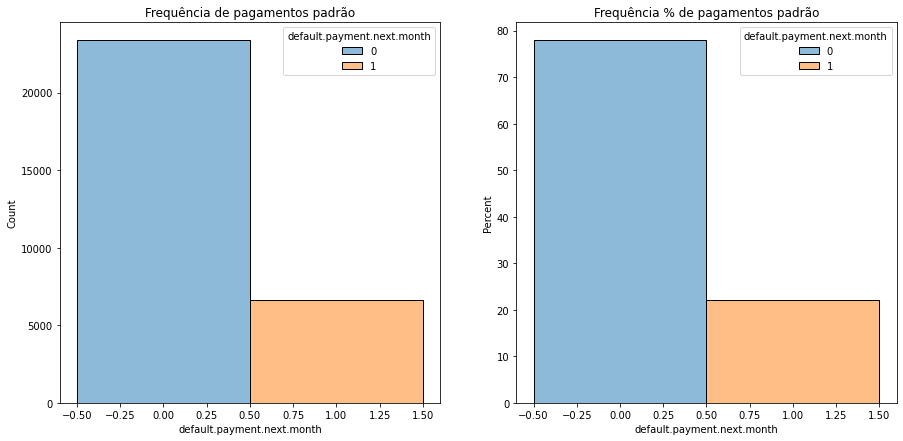

In [ ]:
# Conhecendo a frequência das classes presentes na variável resposta.  
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize =(15, 7))
sns.histplot(data=df, x="default.payment.next.month", hue="default.payment.next.month", discrete = True, ax = axs[0]).set_title("Frequência de pagamentos padrão")
sns.histplot(data=df, x="default.payment.next.month", hue="default.payment.next.month", discrete = True, stat = 'percent', ax = axs[1]).set_title("Frequência % de pagamentos padrão")

df.groupby('default.payment.next.month').size()/len(df)

Como podemos notar, a classe majoritária (0) possui certa de 78% da base, com isso pode nos trazer o paradoxo de acurácia, iremos trabalhar algumas técnicas pra minimizar essa diferença e validarmos os ganhos do ajuste.

Conhecendo as variáveis categóricas e suas frequências com a variável resposta.

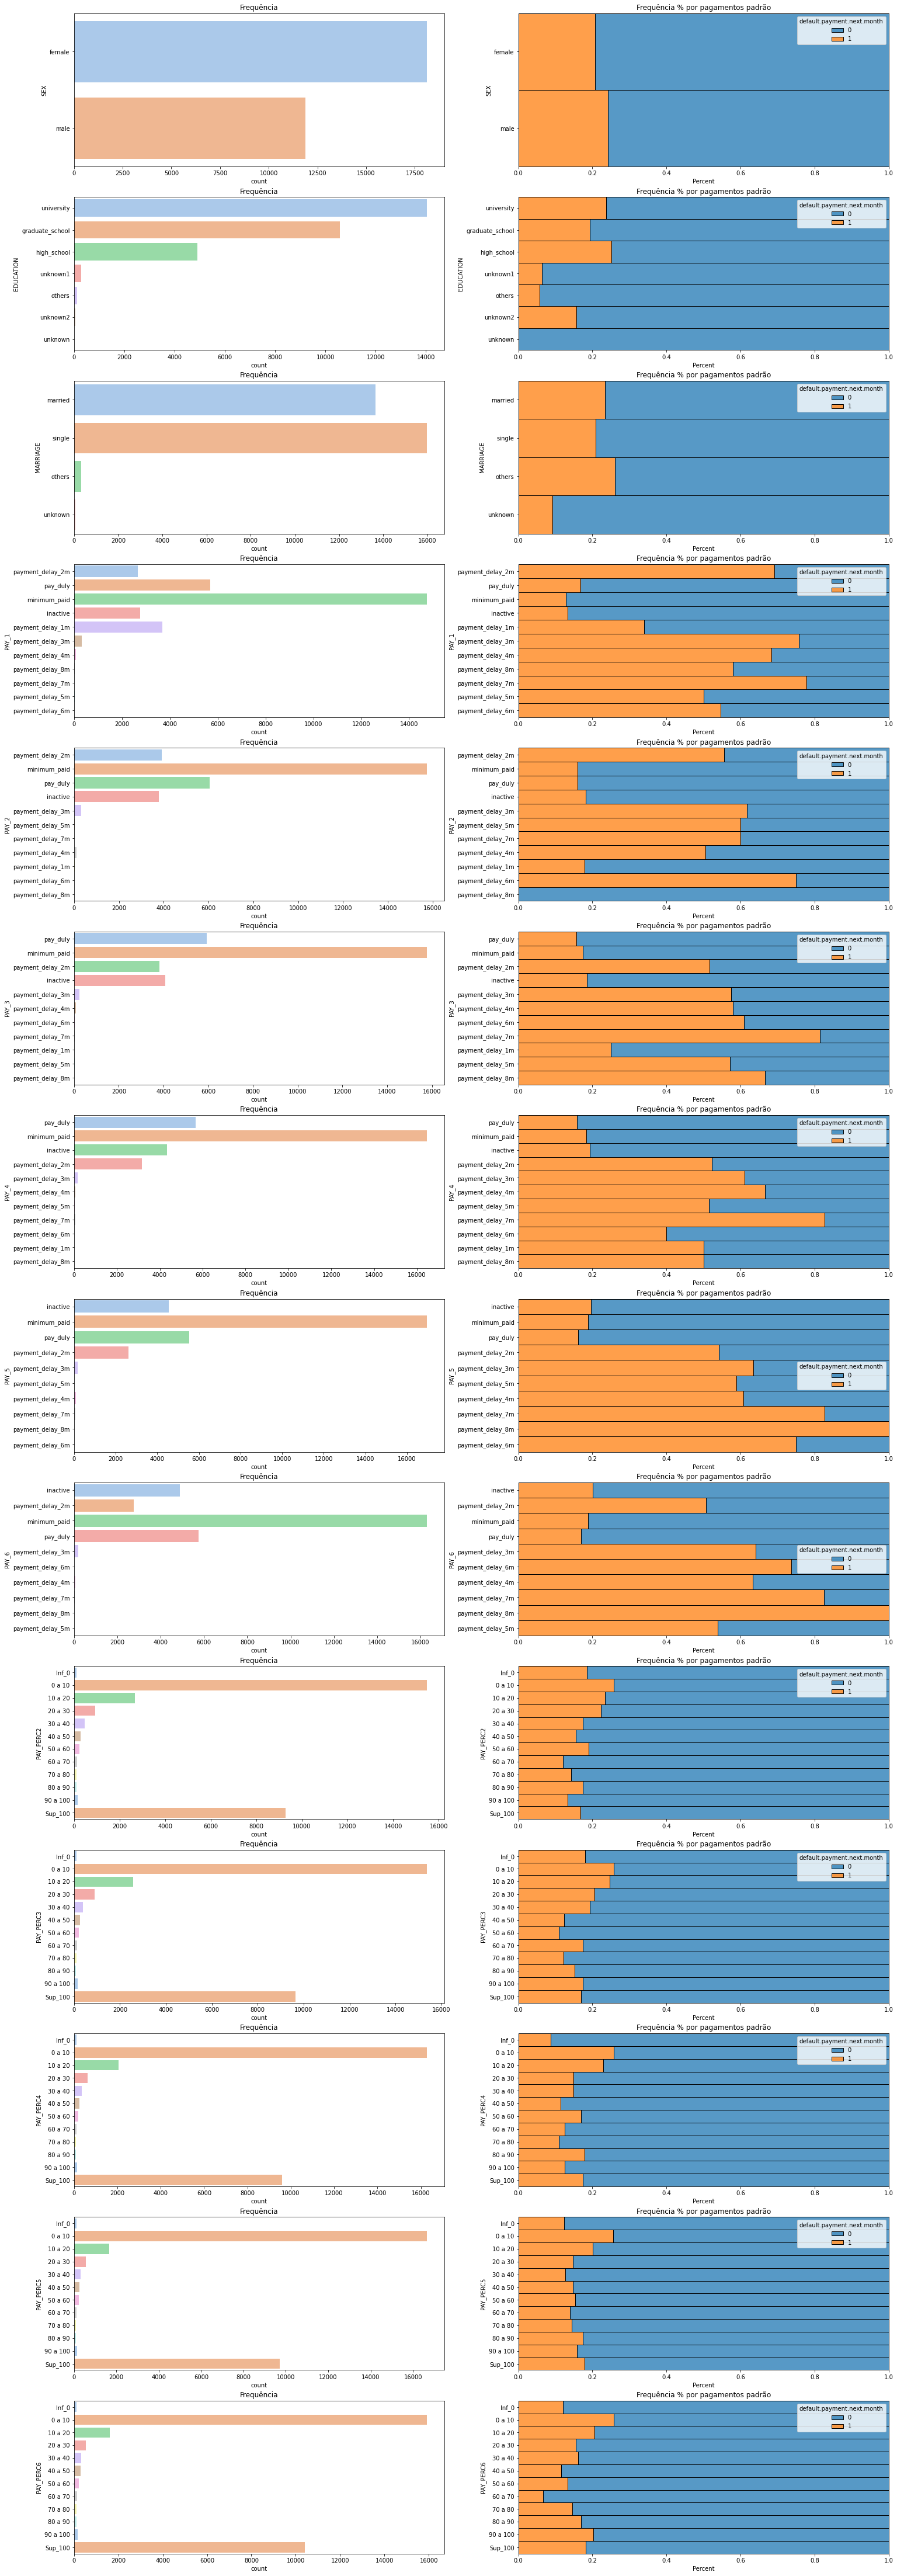

In [ ]:
# Plotando distribuições das variáveis categóricas.
fig,axs= plt.subplots(nrows=len(var_categoricas), ncols=2, figsize=(25,80))

for i, var in enumerate(var_categoricas):
    sns.countplot(data=df, y=var, ax=axs[i][0], palette="pastel").set_title("Frequência")
    sns.histplot(data=df, y=var, hue="default.payment.next.month", discrete = True, stat = 'percent', multiple='fill', ax=axs[i][1]).set_title("Frequência % por pagamentos padrão")

A escolaridade influência no pagamento, como podemos notar nas categorias unknown1, unknown2 e others, da variável education.

O pagamento mínimo é a maior ocorrência em todos os meses das variáveis PAY.

O grupo de percentual pago de 0 a 10% tem maior % de pagamento em todos os meses.

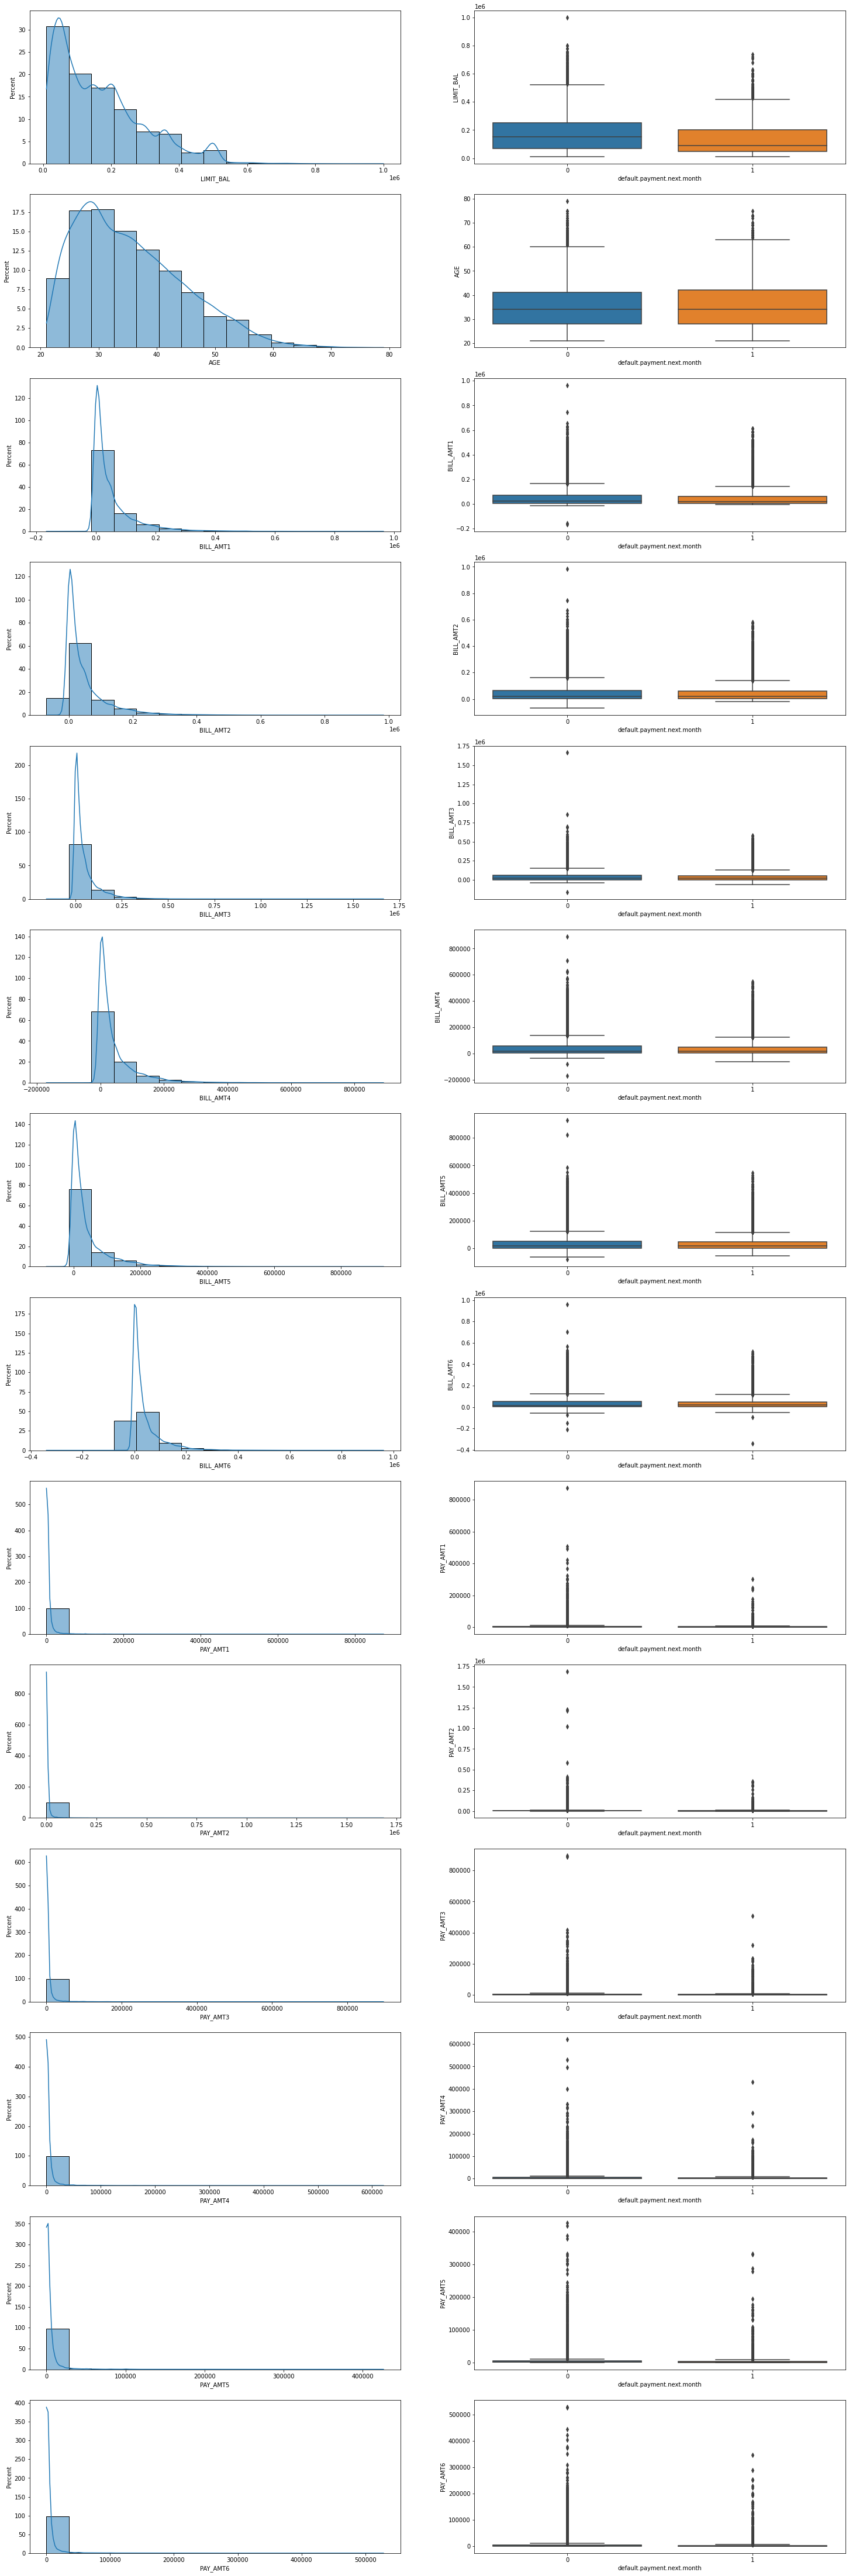

In [ ]:
# Plotando distribuições das variáveis numéricas.
fig,axs= plt.subplots(nrows=len(var_numericas), ncols=2, figsize=(25,80))

for i,var in enumerate(var_numericas):
    sns.histplot(data = df, x= var, bins=15,  ax=axs[i][0], kde=True, stat = 'percent')
    sns.boxplot(data= df, y= var, x='default.payment.next.month', ax=axs[i][1])

Nas variáveis numéricas, podemos ver o indício de muitos outliers pelos boxplots, independente da variável resposta.
Uma forma de eliminar os outliers é utilizando o intervalo interquartílico. 

Conhecendo as correlações entre as variáveis numéricas.

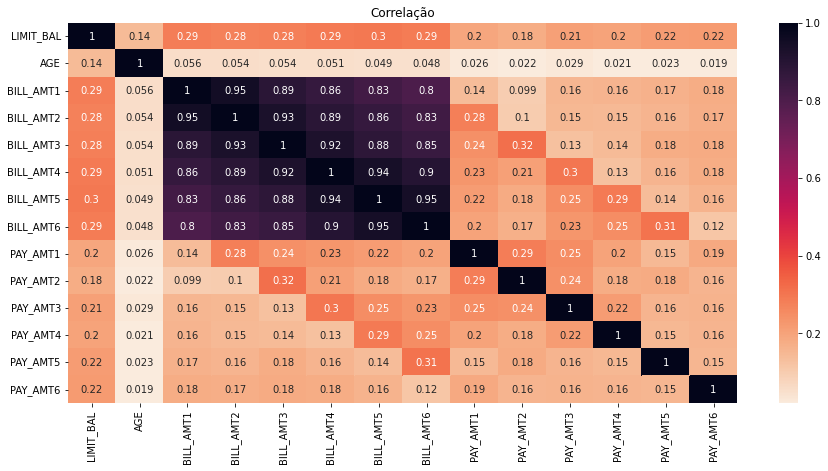

In [ ]:
# Plotando correlação entre as variáveis numéricas.
plt.subplots(figsize=(15,7))
sns.heatmap(df[var_numericas].corr(), annot=True, cmap='rocket_r')
plt.title('Correlação')
plt.show()

As variáveis de valor de fatura possuem forte correlação entre sí, levarei isso em consideração na seleção de variáveis, selecionando apenas a mais recente delas por julgar ser mais importante no estudo.

## MODELAGEM

### Pacotes para modelagem e ajustes na base

In [ ]:
# Carregando pacotes necessários para essa etapa.
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Tipando as variáveis categóricas.
df[var_categoricas+['default.payment.next.month']] = df[var_categoricas+['default.payment.next.month']].astype("category")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_PERC2,PAY_PERC3,PAY_PERC4,PAY_PERC5,PAY_PERC6
0,1,20000.0,female,university,married,24,payment_delay_2m,payment_delay_2m,pay_duly,pay_duly,inactive,inactive,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0 a 10,Sup_100,Sup_100,Sup_100,Sup_100
1,2,120000.0,female,university,single,26,pay_duly,payment_delay_2m,minimum_paid,minimum_paid,minimum_paid,payment_delay_2m,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0 a 10,30 a 40,30 a 40,20 a 30,0 a 10
2,3,90000.0,female,university,single,34,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,10 a 20,10 a 20,0 a 10,0 a 10,0 a 10
3,4,50000.0,female,university,married,37,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,minimum_paid,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0 a 10,0 a 10,0 a 10,0 a 10,0 a 10
4,5,50000.0,male,university,married,57,pay_duly,minimum_paid,pay_duly,minimum_paid,minimum_paid,minimum_paid,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,30 a 40,Sup_100,40 a 50,40 a 50,0 a 10


In [ ]:
# Como possuímos variáveis categóricas, irei aplicar o get_dummies, binarizando cada uma delas.
df = pd.get_dummies(df, columns = var_categoricas)
df.head(5)

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_female,SEX_male,EDUCATION_graduate_school,EDUCATION_high_school,EDUCATION_others,EDUCATION_university,EDUCATION_unknown,EDUCATION_unknown1,EDUCATION_unknown2,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,MARRIAGE_unknown,PAY_1_inactive,PAY_1_minimum_paid,PAY_1_pay_duly,PAY_1_payment_delay_1m,PAY_1_payment_delay_2m,PAY_1_payment_delay_3m,PAY_1_payment_delay_4m,PAY_1_payment_delay_5m,PAY_1_payment_delay_6m,PAY_1_payment_delay_7m,PAY_1_payment_delay_8m,PAY_2_inactive,PAY_2_minimum_paid,PAY_2_pay_duly,PAY_2_payment_delay_1m,PAY_2_payment_delay_2m,PAY_2_payment_delay_3m,PAY_2_payment_delay_4m,PAY_2_payment_delay_5m,PAY_2_payment_delay_6m,PAY_2_payment_delay_7m,...,PAY_PERC2_90 a 100,PAY_PERC2_Sup_100,PAY_PERC3_Inf_0,PAY_PERC3_0 a 10,PAY_PERC3_10 a 20,PAY_PERC3_20 a 30,PAY_PERC3_30 a 40,PAY_PERC3_40 a 50,PAY_PERC3_50 a 60,PAY_PERC3_60 a 70,PAY_PERC3_70 a 80,PAY_PERC3_80 a 90,PAY_PERC3_90 a 100,PAY_PERC3_Sup_100,PAY_PERC4_Inf_0,PAY_PERC4_0 a 10,PAY_PERC4_10 a 20,PAY_PERC4_20 a 30,PAY_PERC4_30 a 40,PAY_PERC4_40 a 50,PAY_PERC4_50 a 60,PAY_PERC4_60 a 70,PAY_PERC4_70 a 80,PAY_PERC4_80 a 90,PAY_PERC4_90 a 100,PAY_PERC4_Sup_100,PAY_PERC5_Inf_0,PAY_PERC5_0 a 10,PAY_PERC5_10 a 20,PAY_PERC5_20 a 30,PAY_PERC5_30 a 40,PAY_PERC5_40 a 50,PAY_PERC5_50 a 60,PAY_PERC5_60 a 70,PAY_PERC5_70 a 80,PAY_PERC5_80 a 90,PAY_PERC5_90 a 100,PAY_PERC5_Sup_100,PAY_PERC6_Inf_0,PAY_PERC6_0 a 10,PAY_PERC6_10 a 20,PAY_PERC6_20 a 30,PAY_PERC6_30 a 40,PAY_PERC6_40 a 50,PAY_PERC6_50 a 60,PAY_PERC6_60 a 70,PAY_PERC6_70 a 80,PAY_PERC6_80 a 90,PAY_PERC6_90 a 100,PAY_PERC6_Sup_100
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Separando base de treino e teste
A proporção ficou 80% para treino, 20% para teste.

In [ ]:
# Separando a variável dependente das independentes.
X = df.drop('default.payment.next.month' , axis =1) 
y = df['default.payment.next.month']

# Separando a base de treino e teste em 80% e 20% respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True,  random_state=13)

In [ ]:
# Aplicando scale nas variáveis numéricas, devido a grande diferença de valores entre elas, podendo tendenciar nosso modelo.
scaler=StandardScaler()
X_train[var_numericas] = scaler.fit_transform(X_train[var_numericas])
X_test[var_numericas] = scaler.transform(X_test[var_numericas])

### Seleção de variáveis
Primeiramente, utilizarei um modelo de classificação simples, pra avaliar as variáveis mais importantes selecionadas por ele.

In [ ]:
# Aplicando o algorítmo de seleção de variável, nesse caso utilizarei regressão logística por se tratar de um problema de classificação e rápido treinamento.
sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X_train, y_train)
vars = list(X_train.columns[sfm_selector.get_support()])
print("As variáveis selecionadas pelo modelo foram: \n",vars)

As variáveis selecionadas pelo modelo foram: 
 ['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'EDUCATION_graduate_school', 'MARRIAGE_single', 'PAY_1_inactive', 'PAY_1_minimum_paid', 'PAY_1_pay_duly', 'PAY_1_payment_delay_1m', 'PAY_1_payment_delay_2m', 'PAY_1_payment_delay_3m', 'PAY_2_inactive', 'PAY_2_minimum_paid', 'PAY_2_pay_duly', 'PAY_2_payment_delay_2m', 'PAY_3_inactive', 'PAY_3_minimum_paid', 'PAY_3_pay_duly', 'PAY_3_payment_delay_2m', 'PAY_4_inactive', 'PAY_4_minimum_paid', 'PAY_4_pay_duly', 'PAY_4_payment_delay_2m', 'PAY_5_inactive', 'PAY_5_minimum_paid', 'PAY_5_pay_duly', 'PAY_5_payment_delay_2m', 'PAY_6_minimum_paid', 'PAY_6_pay_duly', 'PAY_6_payment_delay_2m', 'PAY_PERC2_Sup_100', 'PAY_PERC3_Sup_100', 'PAY_PERC4_0 a 10', 'PAY_PERC4_Sup_100', 'PAY_PERC5_Sup_100', 'PAY_PERC6_Sup_100']


Como comentado na matriz de correlação, iria deixar apenas a variável BILL_ mais recente, porém não tiveram relevância na seleção.

### Primeiro Treinamento - Baseline
Criei um pipeline de treinamento, com 6 modelos de classificação.

Eles passarão por cross validação de 10 partes.

Será criado um dataframe com a média das principais métricas.

In [ ]:
# Treinando modelos de classificação.
models = [('lr',LogisticRegression(max_iter=1000)),
          ('knn',KNeighborsClassifier()),
          ('dt',DecisionTreeClassifier()),
          ('rf', RandomForestClassifier()),
          ('lgb',lgb.LGBMClassifier()),
          ('xgboost', XGBClassifier())]

# Métricas de validação.
scoring = {'accuracy': 'accuracy',  
           'precision': 'precision',
           'recall': 'recall',
           'f1_score':'f1'}

# Função para criação do dataframe de resutlados.
def summarize_dict(dictionary, function, name):
    dict_new = {'Model':name}
    for k,v in dictionary.items():
      dict_new[k] = function(v)
    return pd.DataFrame(dict_new, index = [0])

# Criando dataframe de resultados.
resultados = pd.DataFrame()

# Testando algoritmos com validação cruzada.
for name, model in models:
    print('------------------------------- Treinando modelo', model)

     # criando modelos e gravando resultados.
    resultados = resultados.append(summarize_dict(cross_validate(estimator=model, X=X_train[vars], y=y_train, scoring=scoring, cv=10, return_train_score=True), np.mean,name))

resultados

------------------------------- Treinando modelo LogisticRegression(max_iter=1000)
------------------------------- Treinando modelo KNeighborsClassifier()
------------------------------- Treinando modelo DecisionTreeClassifier()
------------------------------- Treinando modelo RandomForestClassifier()
------------------------------- Treinando modelo LGBMClassifier()
------------------------------- Treinando modelo XGBClassifier()


,Model,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,lr,0.457820,0.012383,0.818708,0.819171,0.671335,0.672481,0.354426,0.356141,0.463746,0.465663
0,knn,0.011887,1.033729,0.793167,0.843250,0.550744,0.728494,0.354802,0.464721,0.431354,0.567450
0,dt,0.334157,0.009610,0.721250,0.993542,0.376476,0.995918,0.396045,0.974806,0.385884,0.985248
0,rf,3.595880,0.097033,0.811833,0.993500,0.626052,0.990983,0.370810,0.979535,0.465605,0.985225
0,lgb,0.466550,0.019325,0.816292,0.839463,0.655622,0.748523,0.357250,0.413266,0.462286,0.532509
0,xgboost,2.403516,0.016098,0.817958,0.822884,0.669687,0.691275,0.349718,0.360473,0.459327,0.473833


Aqui já identificamos os sobreajustes de modelos quando olhamos a diferença nos resultados de teste e treino (principalmente precision), presentes nos modelos de dt, rf e provavelmente no knn.

In [ ]:
# Para a seleção do modelo, considerei os resultados de recall, escolhi o xgboost, mas poderia ter selecionado a regressão também.
model = XGBClassifier().fit(X_train[vars], y_train)

 Accuracy = (TP + TN) / (TP + FP + TN + FN) = 0.822 
 Precision = TP / (TP + FP) = 0.6978527607361963 
 Recall = TP / (TP + FN) = 0.3431372549019608 
 F1-score = 2*((Precision * Recall) / (Precision + Recall)) = 0.46006066734074824


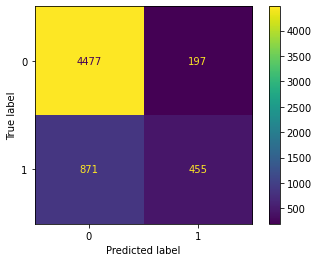

In [ ]:
# Aplicando modelo treinando na base de teste e verificando seus resultados.
predictions = model.predict(X_test[vars])
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Métricas de avaliação.
print(' Accuracy = (TP + TN) / (TP + FP + TN + FN) =', accuracy_score(y_test, predictions), '\n',
'Precision = TP / (TP + FP) =', precision_score(y_test, predictions), '\n',
'Recall = TP / (TP + FN) =', recall_score(y_test, predictions), '\n',
'F1-score = 2*((Precision * Recall) / (Precision + Recall)) =', f1_score(y_test, predictions))

Text(0.5, 0, 'Xgboost Feature Importance')

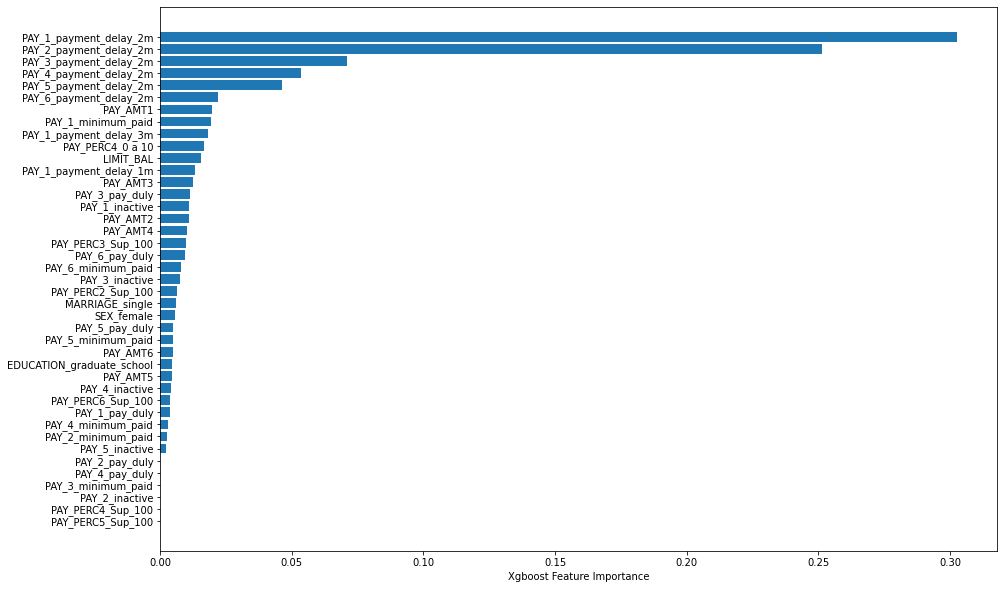

In [ ]:
# Verificando as variáveis de maior importância pro modelo.
importance = model.feature_importances_.argsort()

plt.subplots(figsize=(15,10))
plt.barh(X_train[vars].columns[importance], model.feature_importances_[importance])
plt.xlabel("Xgboost Feature Importance")

O recall na base de teste ficou em linha com a base de treino, ~34%, indicando que não temos problemas de sobreajuste ou falta de convergência.

As variáveis mais importantes para o modelo, são as de últimos pagamentos.
Aqui vemos a possibilidade de refazermos o modelo utilizando apenas as variáveis mais importantes, isso pode gerar ganho de perfomance.


### Treinamento com balanceamento de dados
Vamos verificar se teremos ganho com algumas técnicas para tratar o desbalanceamento de classes.

Carregando pacotes para tratamento de desbalanceamento.

In [ ]:
# Importando pacotes de tratamento. 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

#### Aplicando e avaliando resultados com undersample.

O undersample irá selecionar aleatoriamente dados de rótulo "0" (majoritário).

In [ ]:
# Verificando o desbalanceamento e tratamento.
print('\nAntes do undersample tínhamos {0} rótulos "0" e {1} rótulos "1".'.format(y_train.value_counts()[0],y_train.value_counts()[1]))

undersample = RandomUnderSampler(sampling_strategy=1, random_state=13) # Dessa forma ele fará seleção até termos 1:1
X_under, y_under = undersample.fit_resample(X_train, y_train)

print('\nDepois do undersample temos {0} rótulos "0" e {1} rótulos "1".'.format(y_under.value_counts()[0],y_under.value_counts()[1]))


Antes do undersample tínhamos 18690 rótulos "0" e 5310 rótulos "1".

Depois do undersample temos 5310 rótulos "0" e 5310 rótulos "1".


In [ ]:
# Treinando modelos de classificação.
models = [('lr',LogisticRegression(max_iter=1000)),
          ('knn',KNeighborsClassifier()),
          ('dt',DecisionTreeClassifier()),
          ('rf', RandomForestClassifier()),
          ('lgb',lgb.LGBMClassifier()),
          ('xgboost', XGBClassifier())]

# Métricas de validação
scoring = {'accuracy': 'accuracy',  
           'precision': 'precision',
           'recall': 'recall',
           'f1_score':'f1'}

# Função para criação do dataframe de resutlados.
def summarize_dict(dictionary, function, name):
    dict_new = {'Model':name}
    for k,v in dictionary.items():
      dict_new[k] = function(v)
    return pd.DataFrame(dict_new, index = [0])

# Criando dataframe de resultados.
resultados_under = pd.DataFrame()

# Testando algoritmos com validação cruzada.
for name, model in models:
    print('------------------------------- Treinando modelo', model)

     # criando modelos e gravando resultados.
    resultados_under = resultados_under.append(summarize_dict(cross_validate(estimator=model, X=X_under[vars], y=y_under, scoring=scoring, cv=10, return_train_score=True), np.mean,name))

resultados_under

------------------------------- Treinando modelo LogisticRegression(max_iter=1000)
------------------------------- Treinando modelo KNeighborsClassifier()
------------------------------- Treinando modelo DecisionTreeClassifier()
------------------------------- Treinando modelo RandomForestClassifier()
------------------------------- Treinando modelo LGBMClassifier()
------------------------------- Treinando modelo XGBClassifier()


,Model,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,lr,0.285282,0.010185,0.700565,0.704520,0.771820,0.776771,0.570056,0.574011,0.655426,0.660167
0,knn,0.006866,0.243316,0.662618,0.771730,0.669606,0.783713,0.642750,0.750638,0.655801,0.766810
0,dt,0.120265,0.007404,0.624011,0.994716,0.626749,0.997161,0.613559,0.992258,0.619948,0.994703
0,rf,1.495533,0.051884,0.699623,0.994706,0.729734,0.993901,0.634463,0.995522,0.678553,0.994710
0,lgb,0.319550,0.014349,0.706780,0.801266,0.735010,0.830990,0.646893,0.756372,0.688043,0.791910
0,xgboost,1.069992,0.010062,0.711205,0.729305,0.747489,0.769860,0.638041,0.654195,0.688245,0.707317


 Accuracy = (TP + TN) / (TP + FP + TN + FN) = 0.7506666666666667 
 Precision = TP / (TP + FP) = 0.4542025862068966 
 Recall = TP / (TP + FN) = 0.6357466063348416 
 F1-score = 2*((Precision * Recall) / (Precision + Recall)) = 0.5298554368321811


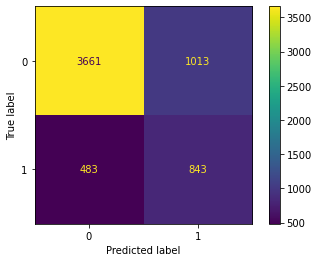

In [ ]:
# Seleção do melhor modelo em recall
model = XGBClassifier().fit(X_under[vars], y_under)

# Aplicando modelo treinando na base de teste e verificando seus resultados.
predictions = model.predict(X_test[vars])
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Métricas de avaliação.
print(' Accuracy = (TP + TN) / (TP + FP + TN + FN) =', accuracy_score(y_test, predictions), '\n',
'Precision = TP / (TP + FP) =', precision_score(y_test, predictions), '\n',
'Recall = TP / (TP + FN) =', recall_score(y_test, predictions), '\n',
'F1-score = 2*((Precision * Recall) / (Precision + Recall)) =', f1_score(y_test, predictions))

Conseguimos ver uma melhoria significativa quando olhamos para o recall, que é a métrica importante nesse estudo.

Passamos de 34% do primeiro modelo para 63%.

#### Aplicando e avaliando resultados com oversample.

O Oversample irá criar dados sintéticos para os rótulos "1" (minoritário).

In [ ]:
# Verificando o desbalanceamento e tratamento.
print('\nAntes do oversample tínhamos {0} rótulos "0" e {1} rótulos "1".'.format(y_train.value_counts()[0],y_train.value_counts()[1]))

oversample = SMOTE(sampling_strategy=1, random_state=13) # Dessa forma ele criará dados sintéticos até termos 1:1
X_over, y_over = oversample.fit_resample(X_train, y_train)

print('\nDepois do oversample temos {0} rótulos "0" e {1} rótulos "1".'.format(y_over.value_counts()[0],y_over.value_counts()[1]))


Antes do oversample tínhamos 18690 rótulos "0" e 5310 rótulos "1".

Depois do oversample temos 18690 rótulos "0" e 18690 rótulos "1".


In [ ]:
# Treinando modelos de classificação.
models = [('lr',LogisticRegression(max_iter=1000)),
          ('knn',KNeighborsClassifier()),
          ('dt',DecisionTreeClassifier()),
          ('rf', RandomForestClassifier()),
          ('lgb',lgb.LGBMClassifier()),
          ('xgboost', XGBClassifier())]

# Métricas de validação
scoring = {'accuracy': 'accuracy',  
           'precision': 'precision',
           'recall': 'recall',
           'f1_score':'f1'}

# Função para criação do dataframe de resutlados.
def summarize_dict(dictionary, function, name):
    dict_new = {'Model':name}
    for k,v in dictionary.items():
      dict_new[k] = function(v)
    return pd.DataFrame(dict_new, index = [0])

# Criando dataframe de resultados.
resultados_over = pd.DataFrame()

# Testando algoritmos com validação cruzada.
for name, model in models:
    print('------------------------------- Treinando modelo', model)

     # criando modelos e gravando resultados.
    resultados_over = resultados_over.append(summarize_dict(cross_validate(estimator=model, X=X_over[vars], y=y_over, scoring=scoring, cv=10, return_train_score=True), np.mean,name))

resultados_over

------------------------------- Treinando modelo LogisticRegression(max_iter=1000)
------------------------------- Treinando modelo KNeighborsClassifier()
------------------------------- Treinando modelo DecisionTreeClassifier()
------------------------------- Treinando modelo RandomForestClassifier()
------------------------------- Treinando modelo LGBMClassifier()
------------------------------- Treinando modelo XGBClassifier()


,Model,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,lr,0.670390,0.014167,0.861049,0.867353,0.926271,0.935902,0.775655,0.788574,0.817804,0.855872
0,knn,0.018483,2.319254,0.842563,0.889938,0.868298,0.925767,0.794275,0.847803,0.809347,0.885064
0,dt,0.411001,0.011595,0.802033,0.995874,0.789353,0.998893,0.800749,0.992848,0.779639,0.995862
0,rf,5.477393,0.121352,0.860246,0.995853,0.903083,0.997448,0.797860,0.994251,0.822584,0.995847
0,lgb,0.859151,0.031920,0.867576,0.882855,0.924935,0.943426,0.791600,0.814417,0.825844,0.874122
0,xgboost,3.998378,0.021176,0.858373,0.865707,0.915103,0.926641,0.781701,0.794150,0.821043,0.855242


 Accuracy = (TP + TN) / (TP + FP + TN + FN) = 0.8201666666666667 
 Precision = TP / (TP + FP) = 0.6549560853199499 
 Recall = TP / (TP + FN) = 0.3936651583710407 
 F1-score = 2*((Precision * Recall) / (Precision + Recall)) = 0.49175694771549694


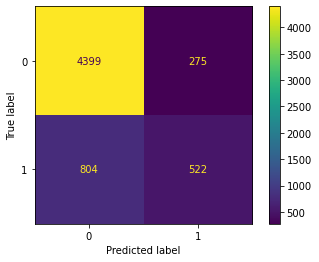

In [ ]:
# Seleção do melhor modelo em recall
model = XGBClassifier().fit(X_over[vars], y_over)

# Aplicando modelo treinando na base de teste e verificando seus resultados.
predictions = model.predict(X_test[vars])
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Métricas de avaliação.
print(' Accuracy = (TP + TN) / (TP + FP + TN + FN) =', accuracy_score(y_test, predictions), '\n',
'Precision = TP / (TP + FP) =', precision_score(y_test, predictions), '\n',
'Recall = TP / (TP + FN) =', recall_score(y_test, predictions), '\n',
'F1-score = 2*((Precision * Recall) / (Precision + Recall)) =', f1_score(y_test, predictions))

Aqui vemos que a abordagem com oversample se mostrou bastante atraente no treino, porém quando olhamos sua aplicação na base teste vemos um resultado bastante diferente.

Melhor que o primeiro modelo, porém não confiável devido ao sobreajuste sofrido.

É possível testar outras estratégias de amostragem, podendo gerar melhorias no resultado. 

#### Aplicando e avaliando resultados com combine.

Combine é a junção do oversample com o undersample vistos anteriormente.

In [ ]:
# Verificando o desbalanceamento e tratamento.
print('\nAntes do oversample tínhamos {0} rótulos "0" e {1} rótulos "1".'.format(y_train.value_counts()[0],y_train.value_counts()[1]))

combine = SMOTEENN(sampling_strategy=.8, random_state=13) # Alteraram a forma de utilizar o sampling pra esse combine, dessa forma fará uma seleção 60/40
X_combine, y_combine = combine.fit_resample(X_train, y_train)

print('\nDepois do oversample temos {0} rótulos "0" e {1} rótulos "1".'.format(y_combine.value_counts()[0],y_combine.value_counts()[1]))


Antes do oversample tínhamos 18690 rótulos "0" e 5310 rótulos "1".

Depois do oversample temos 8369 rótulos "0" e 5590 rótulos "1".


In [ ]:
# Treinando modelos de classificação.
models = [('lr',LogisticRegression(max_iter=1000)),
          ('knn',KNeighborsClassifier()),
          ('dt',DecisionTreeClassifier()),
          ('rf', RandomForestClassifier()),
          ('lgb',lgb.LGBMClassifier()),
          ('xgboost', XGBClassifier())]

# Métricas de validação
scoring = {'accuracy': 'accuracy',  
           'precision': 'precision',
           'recall': 'recall',
           'f1_score':'f1'}

# Função para criação do dataframe de resutlados.
def summarize_dict(dictionary, function, name):
    dict_new = {'Model':name}
    for k,v in dictionary.items():
      dict_new[k] = function(v)
    return pd.DataFrame(dict_new, index = [0])

# Criando dataframe de resultados.
resultados_combine = pd.DataFrame()

# Testando algoritmos com validação cruzada.
for name, model in models:
    print('------------------------------- Treinando modelo', model)

     # criando modelos e gravando resultados.
    resultados_combine = resultados_combine.append(summarize_dict(cross_validate(estimator=model, X=X_combine[vars], y=y_combine, scoring=scoring, cv=10, return_train_score=True), np.mean,name))

resultados_combine

------------------------------- Treinando modelo LogisticRegression(max_iter=1000)
------------------------------- Treinando modelo KNeighborsClassifier()
------------------------------- Treinando modelo DecisionTreeClassifier()
------------------------------- Treinando modelo RandomForestClassifier()
------------------------------- Treinando modelo LGBMClassifier()
------------------------------- Treinando modelo XGBClassifier()


,Model,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,lr,0.263971,0.011430,0.863607,0.872301,0.935793,0.941522,0.825684,0.839036,0.861329,0.887300
0,knn,0.008193,0.440954,0.846627,0.895798,0.888045,0.928744,0.847787,0.894863,0.857555,0.911487
0,dt,0.133897,0.007574,0.803502,0.997341,0.830150,0.999281,0.836675,0.996283,0.822223,0.997779
0,rf,1.790186,0.050039,0.865540,0.997341,0.914997,0.998180,0.853283,0.997385,0.871144,0.997782
0,lgb,0.432617,0.016217,0.862460,0.911153,0.920369,0.955508,0.841097,0.893390,0.864925,0.923403
0,xgboost,1.513501,0.012152,0.860956,0.876989,0.920347,0.930964,0.838108,0.858459,0.865710,0.893240


 Accuracy = (TP + TN) / (TP + FP + TN + FN) = 0.7996666666666666 
 Precision = TP / (TP + FP) = 0.5504065040650407 
 Recall = TP / (TP + FN) = 0.5105580693815988 
 F1-score = 2*((Precision * Recall) / (Precision + Recall)) = 0.5297339593114242


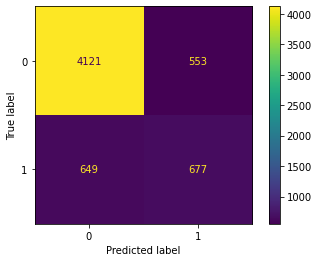

In [ ]:
# Seleção do melhor modelo em recall
model = XGBClassifier().fit(X_combine[vars], y_combine)

# Aplicando modelo treinando na base de teste e verificando seus resultados.
predictions = model.predict(X_test[vars])
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Métricas de avaliação.
print(' Accuracy = (TP + TN) / (TP + FP + TN + FN) =', accuracy_score(y_test, predictions), '\n',
'Precision = TP / (TP + FP) =', precision_score(y_test, predictions), '\n',
'Recall = TP / (TP + FN) =', recall_score(y_test, predictions), '\n',
'F1-score = 2*((Precision * Recall) / (Precision + Recall)) =', f1_score(y_test, predictions))

Aqui vemos novamente que a abordagem se mostrou bastante atraente no treino, porém quando olhamos sua aplicação na base teste vemos um resultado bastante diferente.

Também superior ao primeiro modelo, porém não confiável devido ao sobreajuste sofrido.

Também é possível testar outras estratégias de amostragem, podendo gerar melhorias no resultado. 

## CONCLUSÃO

Diferente de problemas controlados, este desafio de classificação mostrou-se desafiador por possuir diversos fatores semelhantes ao que enfrentamos na vida real, como dados não rotulados corretamente, falta de informação e desbalanceamento de classes.

Foram encontrados insights como a influência da escolaridade nos pagamentos e a alta quantidade de pagamentos de valores mínimos ou inferiores a fatura.

Na modelagem, preferi e procurei demonstrar meus conhecimentos sem utilização de automl, criando uma pipeline de treinos, testes e avaliações para facilitar minhas decisões e acompanhamento.

Iniciei com um modelo base, sempre olhando para a métrica de recall devido o desbalanceamento da base e também a necessidade de assertividade, uma vez que devido o desbalanceamento de 80/20, qualquer modelo que apresente todos os casos como "0" (majoritário) já teria 80% de acurácia (paradoxo de acurácia).

Foi criado três frentes de tratamentos para bases desbalanceadas, acompanhei os resultados e fiz breves comentários sobre os desempenhos.

Existem várias outras técnicas para seleção de variável, criação de variável, combinação, modelos, hiperparâmetros e tunning que não foram utilizadas, neste primeiro momento.

Para encerrar, o modelo de melhor perfomance foi o com tratamento de undersample, pois passamos de um recall de 34% do primeiro modelo (base) para 63%. 
É possível também modificarmos o limite do predict (threshold) para aumentarmos a assertividade sacrificando quantidade de clientes.
Uma outra possibilidade é utilizar o próprio predict como um score, trabalhando com as ordenaçoes de decil (10% melhor pagador), por exemplo.